Tutorial of `AdventCalendar` module in `s2s` package.

In [1]:
import numpy as np
import pandas as pd
import s2spy.time

Create AdventCalendar instance.

In [2]:
calendar = s2spy.time.AdventCalendar(anchor="11-30", freq='90d', n_targets=1)
calendar

AdventCalendar(
    anchor='11-30',
    freq='90d',
    n_targets=1,
    max_lag=0,
    allow_overlap=False,
    mapping=None
)

Map the calendar to a single year.

In [3]:
calendar = calendar.map_years(2020, 2020)
calendar.show()

i_interval,-3,-2,-1,1
anchor_year,,,,
2020,"[2020-03-05, 2020-06-03)","[2020-06-03, 2020-09-01)","[2020-09-01, 2020-11-30)","[2020-11-30, 2021-02-28)"


Map the calendar to multiple years (start year - end year).

In [4]:
calendar = calendar.map_years(2020, 2022)
calendar.show()

i_interval,-3,-2,-1,1
anchor_year,,,,
2022,"[2022-03-05, 2022-06-03)","[2022-06-03, 2022-09-01)","[2022-09-01, 2022-11-30)","[2022-11-30, 2023-02-28)"
2021,"[2021-03-05, 2021-06-03)","[2021-06-03, 2021-09-01)","[2021-09-01, 2021-11-30)","[2021-11-30, 2022-02-28)"
2020,"[2020-03-05, 2020-06-03)","[2020-06-03, 2020-09-01)","[2020-09-01, 2020-11-30)","[2020-11-30, 2021-02-28)"


The calendar can also be displayed in a plot, using `.visualize()`.

This makes it easier to look at calendars containing more intervals:

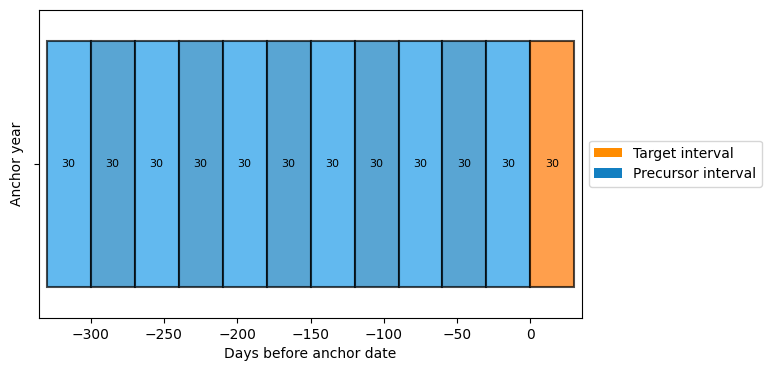

In [5]:
larger_calendar = s2spy.time.AdventCalendar(anchor="11-30", freq='30d', n_targets=1)
larger_calendar.visualize(relative_dates=True, show_length=True)

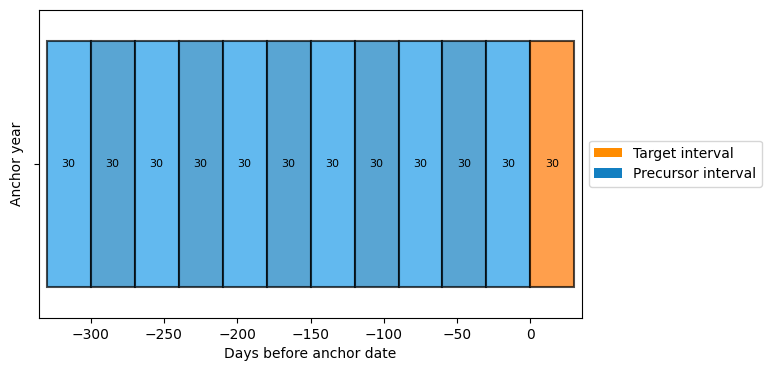

In [6]:
larger_calendar.visualize(relative_dates=True, show_length=True)

For a more informative view, `bokeh` can be used as an alternative method.

Note that this is an optional package, which has to be separately installed with either:

`pip install bokeh` **or** `conda install bokeh`

In [7]:
from bokeh import io
io.output_notebook()

larger_calendar.visualize(interactive=True)

Loading BokehJS ...

Setting relative_dates=True. To see absolute dates, first call calendar.map_years or calendar.map_data


Flatten the indices.

In [8]:
intervals = calendar.map_years(2020, 2022).flat
intervals

anchor_year  i_interval
2022         -3            [2022-03-05, 2022-06-03)
             -2            [2022-06-03, 2022-09-01)
             -1            [2022-09-01, 2022-11-30)
              1            [2022-11-30, 2023-02-28)
2021         -3            [2021-03-05, 2021-06-03)
             -2            [2021-06-03, 2021-09-01)
             -1            [2021-09-01, 2021-11-30)
              1            [2021-11-30, 2022-02-28)
2020         -3            [2020-03-05, 2020-06-03)
             -2            [2020-06-03, 2020-09-01)
             -1            [2020-09-01, 2020-11-30)
              1            [2020-11-30, 2021-02-28)
dtype: interval

Set the maximum lag

In [9]:
calendar.max_lag = 2
calendar.show()

i_interval,-2,-1,1
anchor_year,,,
2022,"[2022-06-03, 2022-09-01)","[2022-09-01, 2022-11-30)","[2022-11-30, 2023-02-28)"
2021,"[2021-06-03, 2021-09-01)","[2021-09-01, 2021-11-30)","[2021-11-30, 2022-02-28)"
2020,"[2020-06-03, 2020-09-01)","[2020-09-01, 2020-11-30)","[2020-11-30, 2021-02-28)"


Map the calendar to the input data.

In [10]:
# create dummy data for testing
time_index = pd.date_range('20171110', '20211211', freq='10d')
var = np.random.random(len(time_index))
# generate input data
test_data = pd.Series(var, index=time_index)
# map year to data
calendar = calendar.map_to_data(test_data)
calendar.show()

i_interval,-2,-1,1
anchor_year,,,
2020,"[2020-06-03, 2020-09-01)","[2020-09-01, 2020-11-30)","[2020-11-30, 2021-02-28)"
2019,"[2019-06-03, 2019-09-01)","[2019-09-01, 2019-11-30)","[2019-11-30, 2020-02-28)"
2018,"[2018-06-03, 2018-09-01)","[2018-09-01, 2018-11-30)","[2018-11-30, 2019-02-28)"


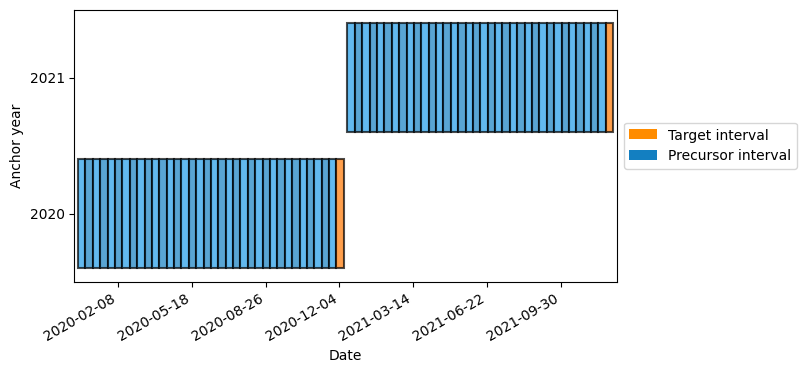

In [11]:
larger_calendar = s2spy.time.AdventCalendar(anchor="11-30", freq='10d', n_targets=1)
larger_calendar.map_years(2020,2021)
larger_calendar.visualize(n_years=3, relative_dates=False)

import matplotlib.pyplot as plt
fig = plt.gcf()
fig.autofmt_xdate()